## IBGE Data Analysis Project

IBGE is the main source for all kinds os statistical data in Brazil. This repository is an exploration of interesting socioeconomic data as well as concepts like Data visualization, REST API abstraction and Test driven development applied to Data Science.

In [38]:
import urllib3
#import json
import matplotlib.pyplot as plot
import numpy
import pandas
from ibge_lib import *

In [39]:
http = urllib3.PoolManager()
http_fn = lambda url: http.request('GET', url)

aggrs_query_url = aggregates_url()
researches = query_ibge(aggrs_query_url, http_fn)

 ### Picking an aggregate

 IBGE's API needs the exact data aggregate code in order to supply any useful data. Therefore, we need to ask for the list of aggregates and search for the code of the aggregate we want. Luckly, these are grouped by research. In this case, we want the National Household Sampling Research (PNAD).

In [40]:
format_fn = lambda x: f"{x['id']}: {x['nome']}"
#list(map(format_fn, researches))

In [41]:
pnad_id = 'B5'
filter_pnad_fn = lambda x: x['id'] == pnad_id
pnad_metadata = next(filter(filter_pnad_fn, researches)) # 'next' gets the first element, in this case
#pnad_data

In [42]:
filtered_aggr = filter_aggregates(pnad_metadata, 'rendimento domiciliar per capita')
format_fn = lambda aggr: f"{aggr['id']}: {aggr['nome']}"
#list(map(format_fn, filtered_aggr))

In [43]:
income_bounds_aggr = 7438
cumm_income_dist_aggr = 7530
avg_income_per_class_aggr = 7532

### Income Boundries

In [66]:
income_bounds_metadata = query_ibge( metadata_url(income_bounds_aggr), http_fn )
#income_bounds_metadata['variaveis']

{'id': 7438,
 'nome': 'Limites superiores das classes de percentual das pessoas em ordem crescente de rendimento domiciliar per capita, a preços médios do ano',
 'URL': 'http://sidra.ibge.gov.br/tabela/7438',
 'pesquisa': 'Pesquisa Nacional por Amostra de Domicílios Contínua anual',
 'assunto': 'Rendimento de todas as fontes',
 'periodicidade': {'frequencia': 'anual', 'inicio': 2012, 'fim': 2020},
 'nivelTerritorial': {'Administrativo': ['N1', 'N2', 'N3'],
  'Especial': [],
  'IBGE': []},
 'variaveis': [{'id': 10769,
   'nome': 'Limites superiores das classes de percentual das pessoas em ordem crescente de rendimento domiciliar per capita, a preços médios do ano',
   'unidade': 'Reais',
   'sumarizacao': []},
  {'id': 10837,
   'nome': 'Coeficiente de variação - Limites superiores das classes de percentual das pessoas em ordem crescente de rendimento domiciliar per capita, a preços médios do ano',
   'unidade': '%',
   'sumarizacao': []}],
 'classificacoes': [{'id': 1019,
   'nome': 'C

In [45]:
income_boounds_var = '10769'
#income_bounds_metadata['classificacoes']

In [46]:
income_bounds_classif = income_bounds_metadata['classificacoes'][0]['id']
income_bounds_classes = [ str(x['id']) for x in income_bounds_metadata['classificacoes'][0]['categorias'] ]
income_bounds_classes_fmt = f'[{",".join(income_bounds_classes)}]'
income_bounds_classes_fmt = f'{income_bounds_classif}{income_bounds_classes_fmt}'
#income_bounds_classes_fmt

In [47]:
var_query_url = variables_url( income_bounds_aggr, [income_boounds_var], [income_bounds_classes_fmt])
income_bounds_response = query_ibge(var_query_url, http_fn )
#income_bounds_response

In [48]:
income_bounds_results = income_bounds_response[0]['resultados'][1:]
income_bounds_serii = map( (lambda x: x['series'][0]['serie']) , income_bounds_results)
income_bounds_serii = list(income_bounds_serii)
#income_bounds_serii

In [49]:
income_percentiles = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 99]
income_bound_columns = list(map( (lambda x: f'P{x}'), income_percentiles ))
years_queried = list(map(int, income_bounds_serii[0].keys()))
years_queried

[2015, 2016, 2017, 2018, 2019, 2020]

In [50]:
series_to_row_fn = lambda series: list(map(float, series.values())) # Note: the 'int' refers to the integer constructor
income_bounds_data = list(map( series_to_row_fn , income_bounds_serii ))
income_bounds_data = numpy.matrix(income_bounds_data).transpose()
income_bounds_data = pandas.DataFrame( income_bounds_data , index=years_queried, columns=income_bound_columns )
income_bounds_data

,P5,P10,P20,P30,P40,P50,P60,P70,P80,P90,P95,P99
2015,123.0,198.0,306.0,411.0,529.0,672.0,814.0,1029.0,1380.0,2177.0,3353.0,7758.0
2016,114.0,197.0,307.0,433.0,552.0,696.0,875.0,1082.0,1479.0,2382.0,3714.0,8658.0
2017,102.0,199.0,316.0,451.0,578.0,730.0,933.0,1130.0,1511.0,2453.0,3821.0,9049.0
2018,103.0,201.0,334.0,473.0,610.0,773.0,967.0,1211.0,1641.0,2625.0,4067.0,9893.0
2019,107.0,211.0,348.0,498.0,650.0,826.0,1002.0,1282.0,1733.0,2723.0,4209.0,10365.0
2020,146.0,252.0,396.0,527.0,673.0,836.0,1035.0,1263.0,1682.0,2646.0,4082.0,9832.0


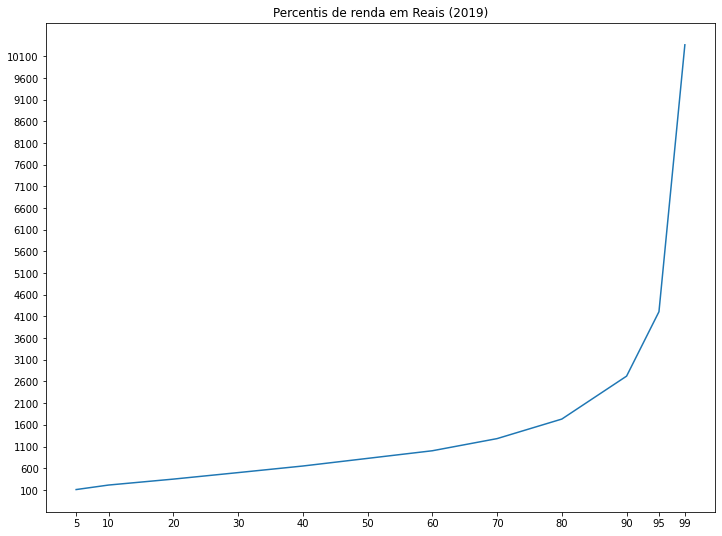

In [79]:
year = 2019
income_boundries = income_bounds_data.loc[[year]].to_numpy()[0]
#income_boundries
fig, ax = plot.subplots()
income_boundries_plot = ax.plot(income_percentiles, income_boundries)
ax.set_title(f'Percentis de renda em Reais ({year})')

fig.set_size_inches(12, 9)
ax.set_xticks(income_percentiles)
ax.set_yticks(numpy.arange(100, 10101, 500))

income_boundries_plot

### Cumulative Income Distribution

In [ ]:
cumm_income_dist_metadata = query_ibge( metadata_url(cumm_income_dist_aggr), http_fn )
#cumm_income_dist_metadata['variaveis']

In [ ]:
cumm_income_dist_var = '10826'
#cumm_income_dist_metadata['classificacoes']

In [ ]:
cumm_income_dist_classif = cumm_income_dist_metadata['classificacoes'][0]['id']
cumm_income_dist_classes = cumm_income_dist_metadata['classificacoes'][0]['categorias'][:-1]
cumm_income_dist_classes = map( lambda x: str(x['id']), cumm_income_dist_classes )
cumm_income_dist_classes_fmt = f"{cumm_income_dist_classif}[{','.join(cumm_income_dist_classes)}]"
#list(cumm_income_dist_classes)
#cumm_income_dist_classes_fmt

In [ ]:
var_query_url = variables_url( cumm_income_dist_aggr, [cumm_income_dist_var], [cumm_income_dist_classes_fmt])
cumm_income_dist_response = query_ibge(var_query_url, http_fn )

In [ ]:
cumm_income_dist_results = cumm_income_dist_response[0]['resultados']
cumm_income_dist_serii = map( lambda x: x['series'][0]['serie'], cumm_income_dist_results )
cumm_income_dist_serii = list(cumm_income_dist_serii)

In [ ]:
cumm_income_dist_data = list(map(series_to_row_fn, cumm_income_dist_serii))
cumm_income_dist_data = numpy.matrix(cumm_income_dist_data).transpose()
cumm_income_dist_data = pandas.DataFrame( cumm_income_dist_data , index=years_queried, columns=income_bound_columns )
cumm_income_dist_data

,P5,P10,P20,P30,P40,P50,P60,P70,P80,P90,P95,P99
2015,0.3,1.0,3.4,6.7,11.1,16.6,23.5,32.0,42.9,58.7,71.0,88.7
2016,0.2,0.9,3.1,6.3,10.5,15.8,22.8,30.9,41.8,57.6,70.1,88.4
2017,0.2,0.8,3.0,6.2,10.4,15.7,22.7,30.9,41.8,57.5,69.8,88.3
2018,0.2,0.8,2.9,6.0,10.1,15.4,22.2,30.4,41.2,56.9,69.4,87.8
2019,0.2,0.8,2.9,6.0,10.1,15.5,22.3,30.6,41.5,57.2,69.4,87.6
2020,0.2,0.9,3.4,6.7,11.2,16.8,23.8,32.2,43.0,58.4,70.5,88.2


In [ ]:
income_per_class_metadata = query_ibge( metadata_url(avg_income_per_class_aggr), http_fn )

ValueError: shape mismatch: objects cannot be broadcast to a single shape

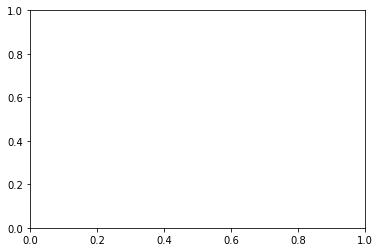

In [ ]:
X = income_percentiles
widths = numpy.array([-5,  -5, -10, -10, -10, -10, -10, -10, -10, - 10,  -5,  -4,   -1])
Y = numpy.array(cumm_income_dist_data)

fig, ax = plot.subplots()
ax.bar(X, Y, align='edge', width=widths)